## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, I will be working to understand the results of an A/B test run by an e-commerce website.  My goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
print('No. of rows',df.shape[0] )   # it will give you no. of rows  

No. of rows 294478


c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()  # it will tell the only about the user_id

290584

In [5]:
df.nunique()    # this can be used to check the whole columns for uniqueness

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [6]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
treat_old=df.query('group== "treatment" and landing_page!= "new_page"')
cntl_new=df.query('group== "control" and landing_page!= "old_page"')

In [8]:
treat_old.shape[0]+cntl_new.shape[0]  # 3893 times new_page and treatment don't match

3893

f. Do any of the rows have missing values?

In [9]:
df.isnull().sum()   # it will give the sum of the missing values in each columns

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

there is no null values or missing values in the whole dataset

In [10]:
#the another method to the same above 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
df_treat= df.query('group== "treatment" and landing_page == "new_page"')
df_treat.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [12]:
df_cont= df.query('group== "control" and landing_page == "old_page"')
df_cont.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [13]:
df2= df_treat.merge(df_cont, how='outer')

In [14]:
df2.head(20)


,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
5,929503,2017-01-18 05:37:11.527370,treatment,new_page,0
6,834487,2017-01-21 22:37:47.774891,treatment,new_page,0
7,803683,2017-01-09 06:05:16.222706,treatment,new_page,0
8,944475,2017-01-22 01:31:09.573836,treatment,new_page,0
9,718956,2017-01-22 11:45:11.327945,treatment,new_page,0


In [15]:
df2.shape

(290585, 5)

In [16]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [17]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

290584 user_id's are unique except one

b. There is one **user_id** repeated in **df2**.  What is it?

In [18]:
sum(df2.user_id.duplicated())

1

c. What is the row information for the repeat **user_id**? 

In [19]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [20]:
df2= df2.drop_duplicates(subset="user_id",keep='first')  #https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/

In [21]:
df2.shape

(290584, 5)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [22]:
convert_mean=df2.converted.mean()
convert_mean

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [23]:
df2.query('group == "control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [24]:
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [25]:
len(df_treat.index)/len(df2.index)

0.5000653855683727

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

According to the above results, that an individual in the treatment group had a conversion rate of 11.88% and an individual had a conversion rate of 12.03% in the control group. This is not a huge difference between the conversion rates of both groups. Moreover, It can be seen above that the probability of an individual received a new page is .50006. This means the individual who received old_page has an equal probability at the same time. 
Within the above circumstances, we can not say one page has more conversions than the other.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

Null Hypothesis: The probability of old page better than new page is greater or equal to probability of new page.
                or
                P_new - P_old <=0
 

Alternative Hypothesis: The probability of new page being better than new page is less than that of a new page.
                         P_new- P_old >=0
   


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [26]:
p_new = df2.converted.mean()  # how many users are converted(=1)   
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [27]:
p_old = df2.converted.mean()  # how many users are converted(=1)
p_old

0.11959708724499628

convert_mean is the same for both pages

c. What is $n_{new}$, the number of individuals in the treatment group?

In [28]:
n_new = df2.query('group=="treatment"').shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [29]:
n_old = df2.query('group=="control"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [30]:
new_page_converted = np.random.choice([0, 1], size=n_new, p=[(1 - convert_mean), convert_mean])
new_page_converted.mean()

0.11906269355171702

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [31]:
old_page_converted = np.random.choice([0, 1], size=n_old, p=[(1 - convert_mean), convert_mean])
old_page_converted.mean()

0.1203312361468673

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [32]:
new_page_converted.mean() -   old_page_converted.mean()

-0.0012685425951502877

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [33]:
p_diffs = []

for i in range(10000):
    new_page_converted = np.random.choice([0, 1], size=n_new, p=[(1 - convert_mean), convert_mean])
    old_page_converted = np.random.choice([0, 1], size=n_old, p=[(1 - convert_mean), convert_mean])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

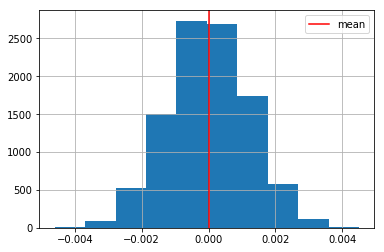

In [34]:
# convert p_diffs to numpy array for array based computations in the future
p_diffs = np.array(p_diffs)

# histogram
plt.hist(p_diffs)
plt.grid()
plt.axvline(p_diffs.mean(), color='r', label='mean')
plt.legend();

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [35]:
treat_cmean=df2.query('group=="treatment"').converted.mean()
cont_cmean=df2.query('group=="control"').converted.mean()
obs_diff=treat_cmean-cont_cmean
obs_diff

-0.0015782389853555567

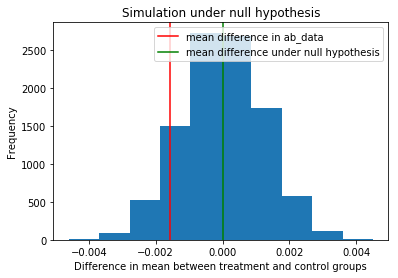

In [36]:
plt.hist(p_diffs)
plt.title('Simulation under null hypothesis')
plt.xlabel('Difference in mean between treatment and control groups')
plt.ylabel('Frequency')
plt.axvline(x=obs_diff, color='red',label='mean difference in ab_data')
plt.axvline(x=p_diffs.mean(),color='green', label='mean difference under null hypothesis')
plt.legend()

In [37]:
(p_diffs>obs_diff).mean()   ### p- vlaule is grather than 0.05 or 0.01 so we fail to reject null hypothesis

0.90600000000000003

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**answer.**


We computed p-value in part j which is also known as scientific studies. P-value is probability of observing statstics(one or more extreme in favour of alternative hypothesis)if the null hypothesis is true.

p-value= 0.906 

Null hypothesis was the difference in means equal or greather than zero and alternative was less than equal to zero.But the mean difference was less than zero and p-value is big so we fail to reject null hypothesis.This means old page is better tahn the new_page.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"').converted.sum()
convert_new = df2.query('group == "treatment"').converted.sum()
n_old = df2.query('group == "control"').converted.count()
n_new = df2.query('group == "treatment"').converted.count()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [39]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller') ##here we used alternative smaller because it is one-tailed experiment.
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**
  In statistics, a z-score tells us how many standard deviations away a value is from the mean.
  p-value in both computations are almost same.
  A positive z-score suggests that our data point is on the right side of the mean line on the bell curve

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer.**

This is a case of Logistic Regression because we want to predict something that has only two possible outcomes.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [40]:
df2['intercept'] = 1   #create intercept


In [41]:
df2[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,0
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,0
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,0


In [42]:
# here, we will use landing_page_old and ab_page_control as our baselines, therefore we need to remove those
df2.drop(['old_page'], axis=1, inplace=True)

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [43]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [44]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 14 Dec 2020   Pseudo R-squ.:               8.077e-06
Time:                        00:21:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**

p-value is 0.190 which is different from the part II.
The logistic regression is two-tailed case and we are exploring only two possible outcomes and it can go either way.


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**
we can add total duration of the experiment to our model.But too short or long duration might effect the results.
we also consider the click through rate.


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [45]:
df_c=pd.read_csv("countries.csv")
df_c.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [46]:
df_c.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [47]:
#create dummies of country column 
country_dummies= pd.get_dummies(df_c['country'])
df_new=df_c.join(country_dummies)
df_new.head()

,user_id,country,CA,UK,US
0,834778,UK,0,1,0
1,928468,US,0,0,1
2,822059,UK,0,1,0
3,711597,UK,0,1,0
4,710616,UK,0,1,0


In [48]:
df1 = df_new.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df1.head()

,country,CA,UK,US,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,,,,
834778,UK,0,1,0,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,0,0,1,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,0,1,0,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,0,1,0,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,0,1,0,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [49]:
df1.shape

(290584, 10)

In [50]:
log_m= sm.Logit(df1['converted'], df1[['intercept', 'UK','US']])
results=log_m.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 14 Dec 2020   Pseudo R-squ.:               1.521e-05
Time:                        00:21:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

Here again, the p-values for the countries are greather a 0.05 (alpha level). So, we fail to reject the null hypothesis.We can conclude that there is no significant contribution by adding countries to the conversion rate of both pages.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [51]:
log_m= sm.Logit(df1['converted'], df1[['intercept', 'ab_page','UK','US']])
results=log_m.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 14 Dec 2020   Pseudo R-squ.:               2.323e-05
Time:                        00:21:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

Again, the value of correation coefficient is less.The p-value (0.191) here remains larger than alpha level(0.05) but p-value is different because this is a two tailed test. We fail to reject the null in this situation.

In [52]:

# Calculate area of lower tail
p_lower = (p_diffs < obs_diff).mean()

# Calculate area of upper tail
upper = p_diffs.mean() - obs_diff
p_upper = (p_diffs > upper).mean()

# Calculate total tail area
p_lower + p_upper

0.186

this is ~0.191(p-value)

In [53]:
df1['US_ab_page'] = df1['US'] * df1['ab_page']
df1['UK_ab_page'] = df1['UK'] * df1['ab_page']
df1.head()

,country,CA,UK,US,timestamp,group,landing_page,converted,intercept,ab_page,US_ab_page,UK_ab_page
user_id,,,,,,,,,,,,
834778,UK,0,1,0,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0
928468,US,0,0,1,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0
822059,UK,0,1,0,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,0,1,0,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0
710616,UK,0,1,0,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [54]:
log_m= sm.Logit(df1['converted'], df1[['intercept', 'ab_page', 'US', 'UK', 'US_ab_page', 'UK_ab_page']])
results=log_m.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 14 Dec 2020   Pseudo R-squ.:               3.482e-05
Time:                        00:21:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

Conclusions:
    
Within the framework this project, we tried to understand whether the company should implement a new page or keep the old page with following:

We calculated that probability of an individual receiving the new page is 0.5001 and this means, that an individual had equal chance to receive the old page.

In A/B test we set up our null and alternative hypothesis to test if new page results in better conversion or not
We simulated our user groups with respect to conversions and calculated the p_value to be 0.903
With this big p-value, we failed to reject null hypothesis
By using the built-in stats.proportions_ztest we computed z-score and p-value which confirmed that A/B test results and results with builtin funtion are almost same and again we failed to reject the null hypothesis
Regression Approach:

Now according to the documented question we need to produce the results which has only two outcomes(yes or no). Whether new page is better or not.
And I used logistic regression because it is good for two outcomes, we again found same z-score as well as p-value of 0.190, corresponding two-tailed case
further adding geographic location of the users, we tried to find if any specific country had an impact on conversion rate but
the result gave a similar outlook and suggested that the countries have no impact on the conversion rate.

None of the variables have significant p-values. Therefore, we will fail to reject the null and we conclude that there is not valid evidence to suggest that there is an interaction between country and page received that will predict whether a user converts or not.

In the end,Based on the all summary statstic information, we do not have sufficient evidence that the new page has more conversions than the old page.

Consideration:

We can look at the duration of the experiment because it might influence the conversion.
we should take into account the both effects as 
Change aversion effect, a group of users may give an unfair advantage to the older page
Novelty effect, users may give an unfair advantage to the newer page

References

#### https://stackoverflow.com/questions/13035764/remove-rows-with-duplicate-indices-pandas-dataframe-and-timeseries

#### https://www.statology.org/z-score-python/

#### https://github.com/statsmodels/statsmodels/issues/3931

In [55]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0